# Section 2: Data Understanding
<br>
<div>
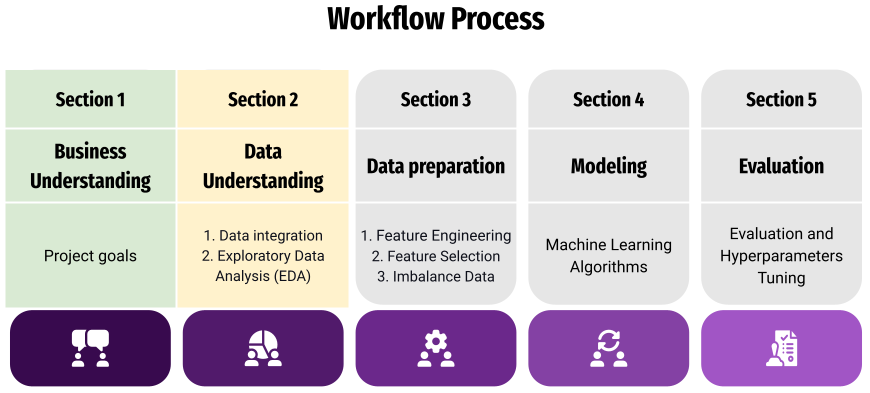
</div>

## 2.1 Data Integration

Data Integration

The process of integrating data from multiple sources into a unified, single view of the data is called data integration.
Business organizations (large or small) engage in many different types of business processes. 

Business processes are a series of activities performed by people, teams, and systems in a structured manner to achieve a business goal. 
 
Every team or department involved in a business process maintains relevant databases that reflect several aspects of the process.

In order to properly reflect a business process, solving a business problem using data science procedures may require different datasets from different sources.

For this reason, data scientists need to understand **what** data is needed, **how** the data can impact the process / problem (features that have an effect on the problem) and **where** are the data sources exist in the organization.

In our project, the Insurance Company has three different departments related to the business process (discussed in the previous chapter):<br>
**1. The Customer Department (responsible for Customer relationships)**<br>
**2. Policies Department (handles insurance policies)**<br>
**3. Claims Department (handles insurance claims)**

In this section, we'll examine the different datasets, decide how they should be combined, and produce a target variable based on the project objectives and business problems.


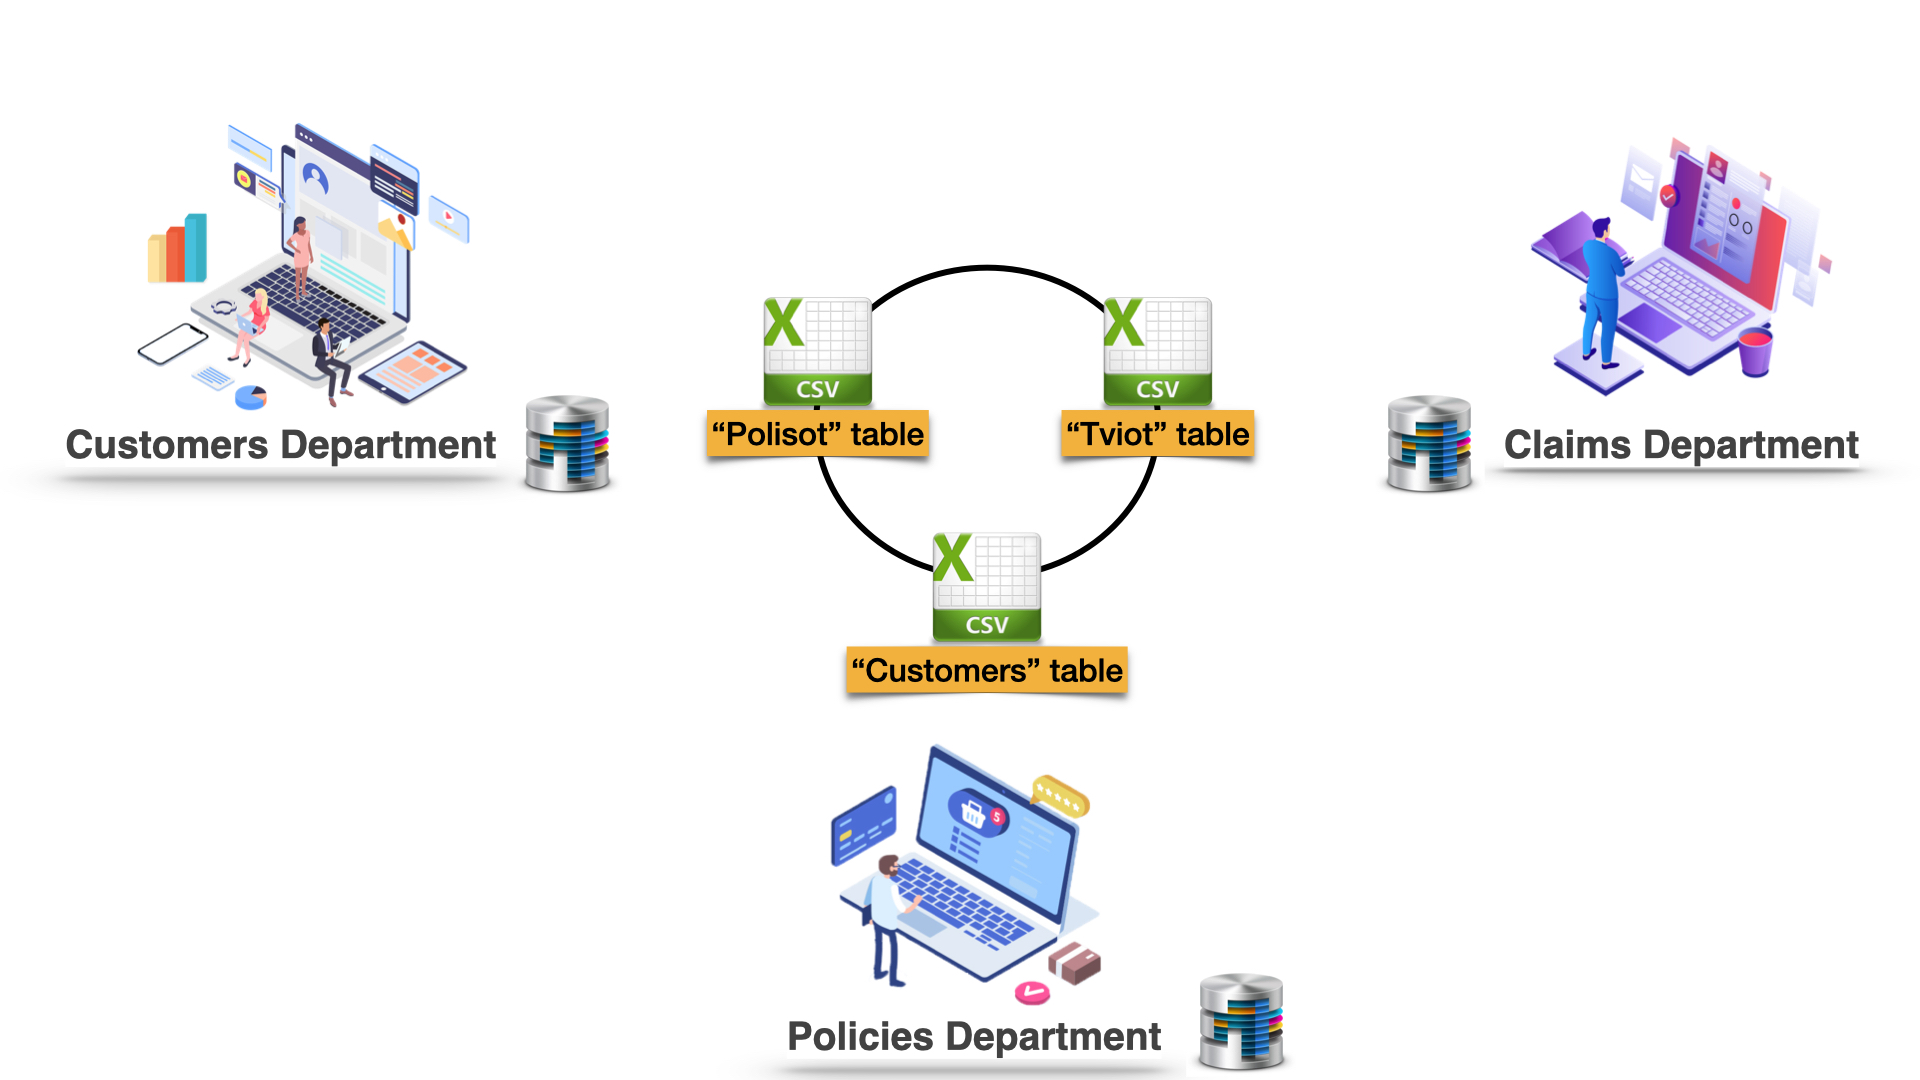

### Datasets & Features:
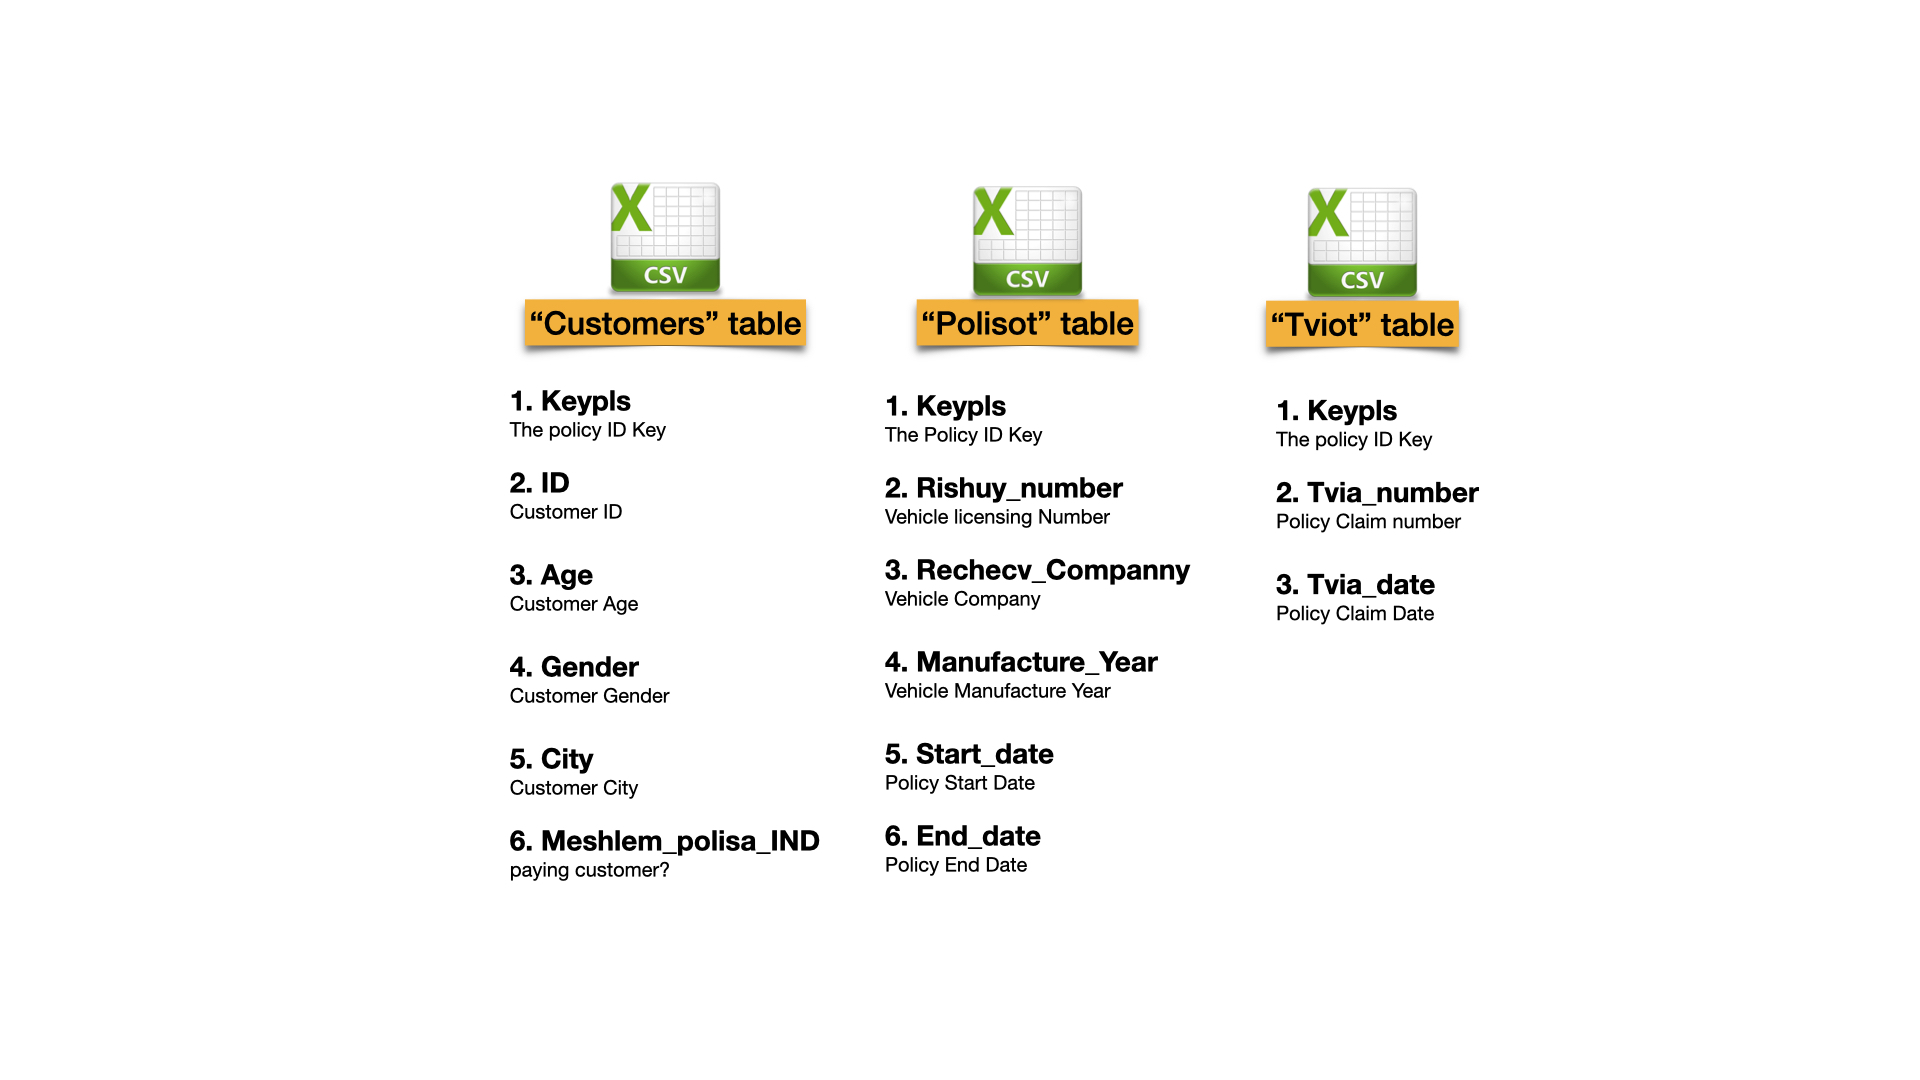

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# let's load the Tviot dataset
# visualise and explore its shape (rows and columns) 

data1_Tviot = pd.read_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/attachments/Tviot.csv')
data1_Tviot.sample(5)

,Unnamed: 0,Keypls,Tvia_number,Tvia_date
622,3557,4557,12652249,2017-03-31
249,1362,2362,1855044,2016-06-24
641,3656,4656,13366336,2016-07-08
9,82,1082,6724,2016-05-02
356,2141,3141,4583881,2016-07-08


In [3]:
data1_Tviot.shape

(711, 4)

In [4]:
data1_Tviot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   711 non-null    int64 
 1   Keypls       711 non-null    int64 
 2   Tvia_number  711 non-null    int64 
 3   Tvia_date    711 non-null    object
dtypes: int64(3), object(1)
memory usage: 22.3+ KB


In [5]:
# let's load the Polisot dataset
# visualise and explore its shape (rows and columns) 

data2_Polisot = pd.read_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/attachments/Polisot.csv')
data2_Polisot.sample(5)

,Unnamed: 0,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date
1859,1859,2859,73004359,Tesla,2016,2016-01-01,2016-12-31
2905,2905,3905,73005405,BMW,2007,2016-01-01,2016-12-31
248,248,1248,73002748,Ford,2005,2016-01-01,2016-08-31
968,968,1968,73003468,Mazda,0,2016-05-02,2017-05-02
410,410,1410,73002910,Ford,2006,2016-09-03,2017-05-04


In [6]:
data2_Polisot.shape

(4001, 7)

In [7]:
data2_Polisot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        4001 non-null   int64 
 1   Keypls            4001 non-null   int64 
 2   Rishuy_number     4001 non-null   int64 
 3   Rechecv_Companny  3832 non-null   object
 4   Manufacture_Year  4001 non-null   int64 
 5   Start_date        4001 non-null   object
 6   End_date          4001 non-null   object
dtypes: int64(4), object(3)
memory usage: 218.9+ KB


In [8]:
# let's load the Customers dataset
# visualise and explore its shape (rows and columns) 

data3_Customers = pd.read_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/attachments/Customers.csv')
data3_Customers.sample(5)

,Unnamed: 0,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND
6345,6345,300607245,61,Male,Jerusalem,3101,1
7918,7918,300608818,18,Female,Tel Aviv,2324,1
4170,4170,300605070,36,Male,Jerusalem,1140,1
4374,4374,300605274,24,Female,Jerusalem,4131,1
945,945,300601845,57,Male,Tel Aviv,3503,0


In [9]:
data3_Customers.shape

(8000, 7)

In [10]:
data3_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8000 non-null   int64 
 1   ID                  8000 non-null   int64 
 2   Age                 8000 non-null   int64 
 3   Gender              8000 non-null   object
 4   City                8000 non-null   object
 5   Keypls              8000 non-null   int64 
 6   Meshlem_polisa_IND  8000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 437.6+ KB


## Data analysis and manipulation tools
### Pandas & SQL

SQL (structured query language) is a programming language designed for eliciting information from databases. <br> Pandas is an open-source Python library for data analysis and manipulation. <br>
Pandas and SQL both use tabular data, and both have similar operations and queries (at least at the basic level). <br>

Choosing which tool to utilize depends on where we hold the data and what we want to achieve and do with it. <br>
Generally, SQL is used when data is stored in databases or different sources. If, however, the data is already in a file format and is accessible locally, we can utilize Pandas. <br>
In our project, we will use the Pandas library (our data sets stored locally in CSV files format). 

[Pandas - Comparison with SQL](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html)
<br>
<div>
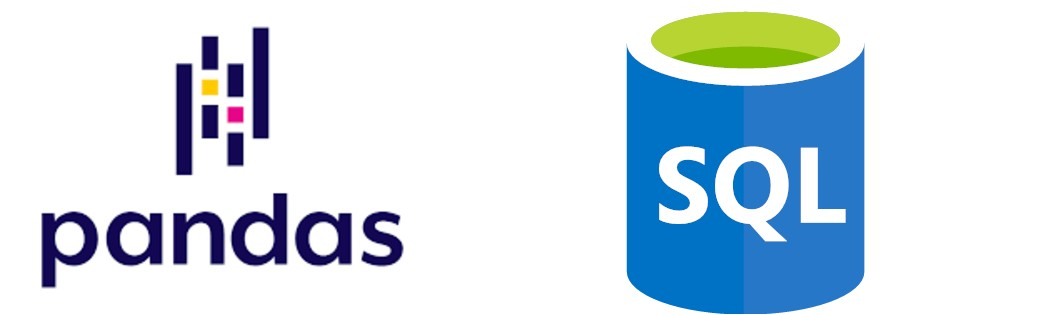
</div>
<br>

In [11]:
# First, let's check if we have duplicate records in our datasets (for every dataset)

duplicateRowsDF1 = data1_Tviot[data1_Tviot.duplicated()]
duplicateRowsDF2 = data2_Polisot[data2_Polisot.duplicated()]
duplicateRowsDF3 = data3_Customers[data3_Customers.duplicated()]
print(duplicateRowsDF1)
print(duplicateRowsDF2)
print(duplicateRowsDF3)

Empty DataFrame
Columns: [Unnamed: 0, Keypls, Tvia_number, Tvia_date]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Keypls, Rishuy_number, Rechecv_Companny, Manufacture_Year, Start_date, End_date]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, ID, Age, Gender, City, Keypls, Meshlem_polisa_IND]
Index: []


According to ״Meshlem_polisa_IND״ feature (1 for "Meshalem" and 0 for not "Meshalem") in the Customers table, and the fact that in the Customers table, we have 8K records (without duplications)
and in the "Polisot" table, we have only 4K policies (records without duplications). We can conclude that some policies have more than one customer. I.e. Multiple-driver policy insurance (MDP).

In [12]:
# let's check how many costumers belong to the same policy

# A common SQL operation would be getting the count of records in each group throughout a dataset
# SELECT Keypls, count(*)
# FROM data3_Customers
# GROUP BY Keypls;

# The pandas equivalent would be: df.groupby('Keypls').size()

g_Customers = data3_Customers.groupby('Keypls').size().to_frame('number') 
top_g_Customers = g_Customers.nlargest(10, columns="number").tail(10)
top_g_Customers

,number
Keypls,
2713,8
4592,8
1037,7
1046,7
1157,7
1205,7
1560,7
1562,7
1568,7


In [13]:
g_Customers.count()

number    3493
dtype: int64

We can see that we have 3493 unique policies.
<br>
For example, policy 2713 has eight customers.

## SELECT

A common SQL operation would be column selection (with or without conditions) throughout a dataset

**SQL syntax:** <br>
**SELECT** * <br>
**FROM** data3_Customers <br>
**WHERE** Keypls = 2713
<br><br>
**The pandas equivalent would be:** <br>
f.loc[colums and conditions]

In [14]:
# let's explore and visualise the MDP

data3_Customers.loc[data3_Customers['Keypls'] == 2713]

,Unnamed: 0,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND
119,119,300601019,24,Male,Jerusalem,2713,0
356,356,300601256,52,Male,Jerusalem,2713,0
1105,1105,300602005,26,Male,Tel Aviv,2713,0
1442,1442,300602342,17,Female,Ashdod,2713,0
2035,2035,300602935,72,Female,Jerusalem,2713,0
5298,5298,300606198,54,Male,Haifa,2713,0
5742,5742,300606642,26,Female,Tel Aviv,2713,0
6020,6020,300606920,43,Male,Tel Aviv,2713,1


In [15]:
# let's check the same for the Polisot table and make sure that every policy in the table represent only one policy

g_Polisot = data2_Polisot.groupby("Keypls").size().to_frame(name='number') # shows only the size
g_Polisot.nlargest(3, columns="number").tail(10)

,number
Keypls,
1000,1
1001,1
1002,1


In [16]:
# and also for the Tviot table.

T_Polisot= data1_Tviot.groupby("Keypls").size().to_frame(name='number') # shows only the size
T_Polisot.nlargest(3, columns="number").tail(10)

,number
Keypls,
1002,1
1004,1
1020,1


The MDP creates a new challenge. 
<br>
If a policy exists in the Tviot table - we know that one of the drivers in this policy made an accident. 
<br>
But we can't know who is the specific driver among the policy members who made it.  (and we cant learn and catch patterns of the particular customer in these policies).
<br>
<br>
To deal with that. First, for all the drivers in the specific policy (that exists in the Tviot table) we will indicate a target variable with a policy claim ("Tvia" = 1). 
second, we will create a new feature with the number of policy members. by that we will try to express the pattern of MDP.
<br>
<br>
We can assume that as more people are associated with the same policy (more drivers per vehicle), the chance of an accident (an insurance claim) will increase.

In [17]:
g_Customers['Keypls'] = g_Customers.index
g_Customers.reset_index(drop=True,inplace=True)
g_Customers

,number,Keypls
0,2,1000
1,2,1001
2,6,1002
3,1,1003
4,1,1004
...,...,...
3488,1,4994
3489,1,4995
3490,2,4996
3491,2,4998


In [18]:
# let's count the number of customers that have the same keypols (for each keypols)
# keypls number (i.e., belong to the same policy) and store it in a new feature, "NumInP"

data3_Customers['NumInP'] = 0
for i in range(len(g_Customers)):
    for j in range(len(data3_Customers)):
        if g_Customers['Keypls'][i] == data3_Customers['Keypls'][j]:
            #print(data3_Customers.loc[[j],:])
            data3_Customers['NumInP'][j] = g_Customers['number'][i]

In [19]:
data3_Customers['NumInP']

0       4
1       5
2       2
3       3
4       5
       ..
7995    5
7996    3
7997    3
7998    2
7999    2
Name: NumInP, Length: 8000, dtype: int64

In [21]:
data3_Customers.sample(5)

,Unnamed: 0,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND,NumInP
821,821,300601721,75,Male,Tel Aviv,3765,0,3
3329,3329,300604229,38,Male,Tel Aviv,4019,0,3
7183,7183,300608083,20,Male,Jerusalem,4490,1,5
1339,1339,300602239,25,Female,Ashdod,1956,0,3
3697,3697,300604597,43,Female,Tel Aviv,2398,0,5


In [22]:
# let's explore the results
# 'NumInP' has 8 unique values (group size).
# for example the policy 4490 with five costumers

data3_Customers['NumInP'].unique()

array([4, 5, 2, 3, 1, 6, 8, 7])

In [23]:
data3_Customers.loc[data3_Customers['Keypls'] == 4490] 

,Unnamed: 0,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND,NumInP
1937,1937,300602837,20,Female,Tel Aviv,4490,0,5
4182,4182,300605082,56,Male,Jerusalem,4490,0,5
4807,4807,300605707,70,Female,Tel Aviv,4490,0,5
6999,6999,300607899,19,Male,Ashdod,4490,0,5
7183,7183,300608083,20,Male,Jerusalem,4490,1,5


## Full join (outher)

FULL JOINs display both sides of the dataset whether or not the joined columns find a match.

**SQL syntax:** <br>
 **SELECT** * <br>
 **FROM** data3_Customers <br>
 **FULL OUTER JOIN** data2_Polisot<br>
 **ON** data3_Customers.key = data2_Polisot.key;

**The pandas equivalent would be:** <br>
pd.merge(df1,df2, on= "key", how = "outer")

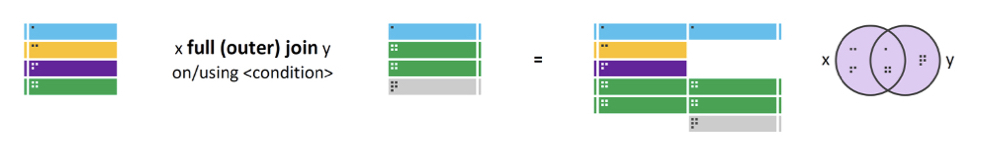

In [24]:
# Let's do marge (full join) between Customers table and Polisot table

full_join = pd.merge(data3_Customers, data2_Polisot, on="Keypls", how="outer",indicator=True) 

In [25]:
full_join.sample(10)

,Unnamed: 0_x,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND,NumInP,Unnamed: 0_y,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date,_merge
5818,6041.0,300606941.0,58.0,Female,Tel Aviv,1101,0.0,4.0,101,73002601,BMW,2004,2016-04-08,2017-04-08,both
1733,646.0,300601546.0,23.0,Male,Tel Aviv,1886,0.0,5.0,886,73003386,Fiat,2004,2016-01-01,2016-12-31,both
4703,2284.0,300603184.0,25.0,Male,Tel Aviv,1671,0.0,2.0,671,73003171,Ford,2014,2016-01-01,2016-12-31,both
6298,5423.0,300606323.0,41.0,Male,Jerusalem,2621,1.0,3.0,1621,73004121,Ford,2016,2016-11-11,2017-11-11,both
4260,1968.0,300602868.0,24.0,Male,Tira,2108,0.0,5.0,1108,73003608,BMW,2009,2016-05-02,2017-05-02,both
3691,1796.0,300602696.0,56.0,Female,Tel Aviv,2195,0.0,6.0,1195,73003695,Ford,2000,2016-01-01,2016-12-31,both
7823,7001.0,300607901.0,29.0,Male,Jerusalem,4987,0.0,2.0,3987,73006487,Ford,2014,2016-05-02,2016-12-31,both
1051,1993.0,300602893.0,73.0,Male,Jerusalem,2915,0.0,4.0,1915,73004415,Fiat,2012,2016-04-08,2017-04-08,both
4812,2369.0,300603269.0,68.0,Female,Tel Aviv,4259,0.0,2.0,3259,73005759,Ford,2007,2016-01-01,2016-12-31,both
4224,3806.0,300604706.0,25.0,Female,Tel Aviv,4547,1.0,2.0,3547,73006047,Ford,2016,2016-11-11,2017-11-11,both


In [26]:
full_join = full_join.groupby("_merge").size() # shows only the size
full_join

_merge
left_only        0
right_only     508
both          8000
dtype: int64

we can see that we have 508 polices without costomers

In [27]:
# Let's make sure that we have a policy in the polisot table but not in the customers table.

data3_Customers.loc[data3_Customers['Keypls'] == 4723] 

,Unnamed: 0,ID,Age,Gender,City,Keypls,Meshlem_polisa_IND,NumInP


In [28]:
data2_Polisot.loc[data2_Polisot['Keypls'] == 4723] 

,Unnamed: 0,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date
3723,3723,4723,73006223,Ford,2013,2016-01-01,2016-08-31


We have 508 policies without customers.
<br>
We can do **"inner join"** and take only the common records in both tables <br>
(i.e., to drop the 508 records the policies without customers) or do **(outer) full join** and decide how to handle it in the following sections 
#### We will perform the second method - The full (outer) join. 


## Inner join

**SQL syntax:** <br>
 **SELECT** * <br>
 **FROM** data2_Polisot <br>
 **INNER JOIN** data3_Customers<br>
 **ON** data2_Polisot.key = data3_Customers.key;

**The pandas equivalent would be:** <br>
pd.merge(df1, df2, on="key")

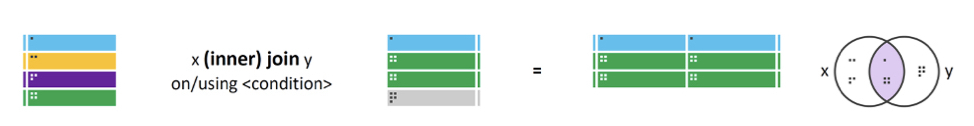

In [29]:
data_2 = pd.merge(data2_Polisot, data3_Customers, on="Keypls",how="outer",indicator=True) # small is in left
data_2.groupby("_merge").size() # shows only the size

_merge
left_only      508
right_only       0
both          8000
dtype: int64

In [30]:
data_2.sample(5)

,Unnamed: 0_x,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date,Unnamed: 0_y,ID,Age,Gender,City,Meshlem_polisa_IND,NumInP,_merge
8284,3888,4888,73006388,Ford,2015,2016-11-11,2017-11-11,4975.0,300605875.0,40.0,Female,Tel Aviv,1.0,1.0,both
6642,3112,4112,73005612,Tesla,2009,2016-05-02,2017-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8064,3792,4792,73006292,Mazda,2008,2016-01-01,2016-12-31,6698.0,300607598.0,74.0,Female,Tira,0.0,4.0,both
3962,1844,2844,73004344,NaN,2009,2016-01-01,2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
815,354,1354,73002854,Mazda,2005,2016-05-02,2017-05-02,2278.0,300603178.0,55.0,Male,Jerusalem,0.0,4.0,both


In [31]:
# let's drop the indicator colum
data_2.drop(columns='_merge',inplace=True)

In [32]:
data_2.isna().sum()

Unnamed: 0_x            0
Keypls                  0
Rishuy_number           0
Rechecv_Companny      348
Manufacture_Year        0
Start_date              0
End_date                0
Unnamed: 0_y          508
ID                    508
Age                   508
Gender                508
City                  508
Meshlem_polisa_IND    508
NumInP                508
dtype: int64

### Producing the **"Y target"** variable from the different datasets:
Now we need to produce the **Y target** variable. <br>
To do that, we will merge the data2 with the Tviot table - we do it by **LEFT OUTER JOIN**.

After the merge, we will get a new feature "y" which is the target variable. <br>
For samples that get NAN values (and left_only by the marge indicator), we can assign y value to 0 (not claim)<br>
And for samples with values at "Tvia_number", "Tvia_date" (and "both" by the marge indicator), we can assign y value to 1 (a claim has been made)

This way, by merging the different datasets, we will produce the target variable.


## LEFT OUTER JOIN

The result of left outer join includes the unmatched rows from only the table that is specified before the LEFT OUTER JOIN clause.

**SQL syntax:** <br>
 **SELECT** * <br>
 **FROM>** data_2 <br>
 **LEFT OUTER JOIN** data1_Tviot<br>
 **ON** data2_Polisot.key = data3_Customers.key;

**The pandas equivalent would be:** <br>
pd.merge(df1, df2, on="key",how="left")

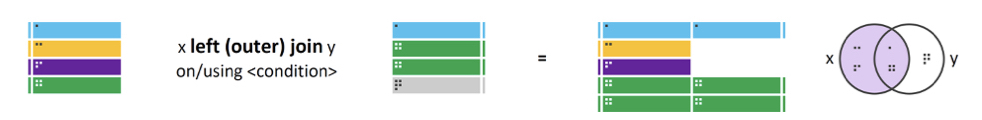

In [33]:
data1_Tviot.shape

(711, 4)

In [34]:
# left outer join between data_2 table and Tviot table

df = pd.merge(data_2, data1_Tviot, on="Keypls", how="left",indicator=True) 
df.groupby("_merge").size() 

_merge
left_only     6956
right_only       0
both          1552
dtype: int64

In [35]:
df.shape

(8508, 18)

In [36]:
df.sample(3)

,Unnamed: 0_x,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date,Unnamed: 0_y,ID,Age,Gender,City,Meshlem_polisa_IND,NumInP,Unnamed: 0,Tvia_number,Tvia_date,_merge
4804,2246,3246,73004746,Ford,2013,2016-04-08,2017-04-08,707.0,300601607.0,58.0,Male,Haifa,0.0,2.0,NaN,NaN,NaN,left_only
655,284,1284,73002784,BMW,2000,2016-09-03,2017-02-01,1328.0,300602228.0,68.0,Female,Haifa,0.0,3.0,NaN,NaN,NaN,left_only
710,306,1306,73002806,Mazda,2012,2016-04-08,2016-12-07,2961.0,300603861.0,28.0,Male,Ashdod,0.0,3.0,NaN,NaN,NaN,left_only


**Note** - the features "Tvia_number", "Tvia_date" will not be available in real-time and can't improve our models (will have data redundancy).<br>
we will keep them only for the EDA section.

In [37]:
# we will use the merge indicator to produce the 1/0 values

df['y'] = df['_merge'].map( {'left_only': 0, 'both': 1}).astype(int)

In [38]:
# we will drop the indicator columns

df.drop(['Unnamed: 0', 'Unnamed: 0_x','Unnamed: 0_y','_merge'],axis = 1,inplace=True)

In [39]:
df.sample(3)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date,ID,Age,Gender,City,Meshlem_polisa_IND,NumInP,Tvia_number,Tvia_date,y
363,1157,73002657,Tesla,2014,2016-05-02,2017-05-02,300606434.0,37.0,Female,Tel Aviv,0.0,7.0,NaN,NaN,0
638,1276,73002776,Ford,2001,2016-04-08,2017-04-08,300607465.0,18.0,Male,Haifa,0.0,4.0,NaN,NaN,0
4330,3020,73004520,Ford,2010,2016-05-02,2017-05-02,300604624.0,72.0,Male,Jerusalem,0.0,4.0,NaN,NaN,0
